I'm using a dataset that contains the house prices for King County which includes Seattle. The dataset covers the house prices for homes sold between May 2014 and May 2015

Original dataset: https://www.kaggle.com/harlfoxem/housesalesprediction

# Data Processing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("C:/Users/Sophie/Desktop/kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Data Cleaning and Understanding Our Data

In [3]:
data.drop(['id', 'zipcode'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(13), object(1)
memory usage: 3.1+ MB


In [4]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

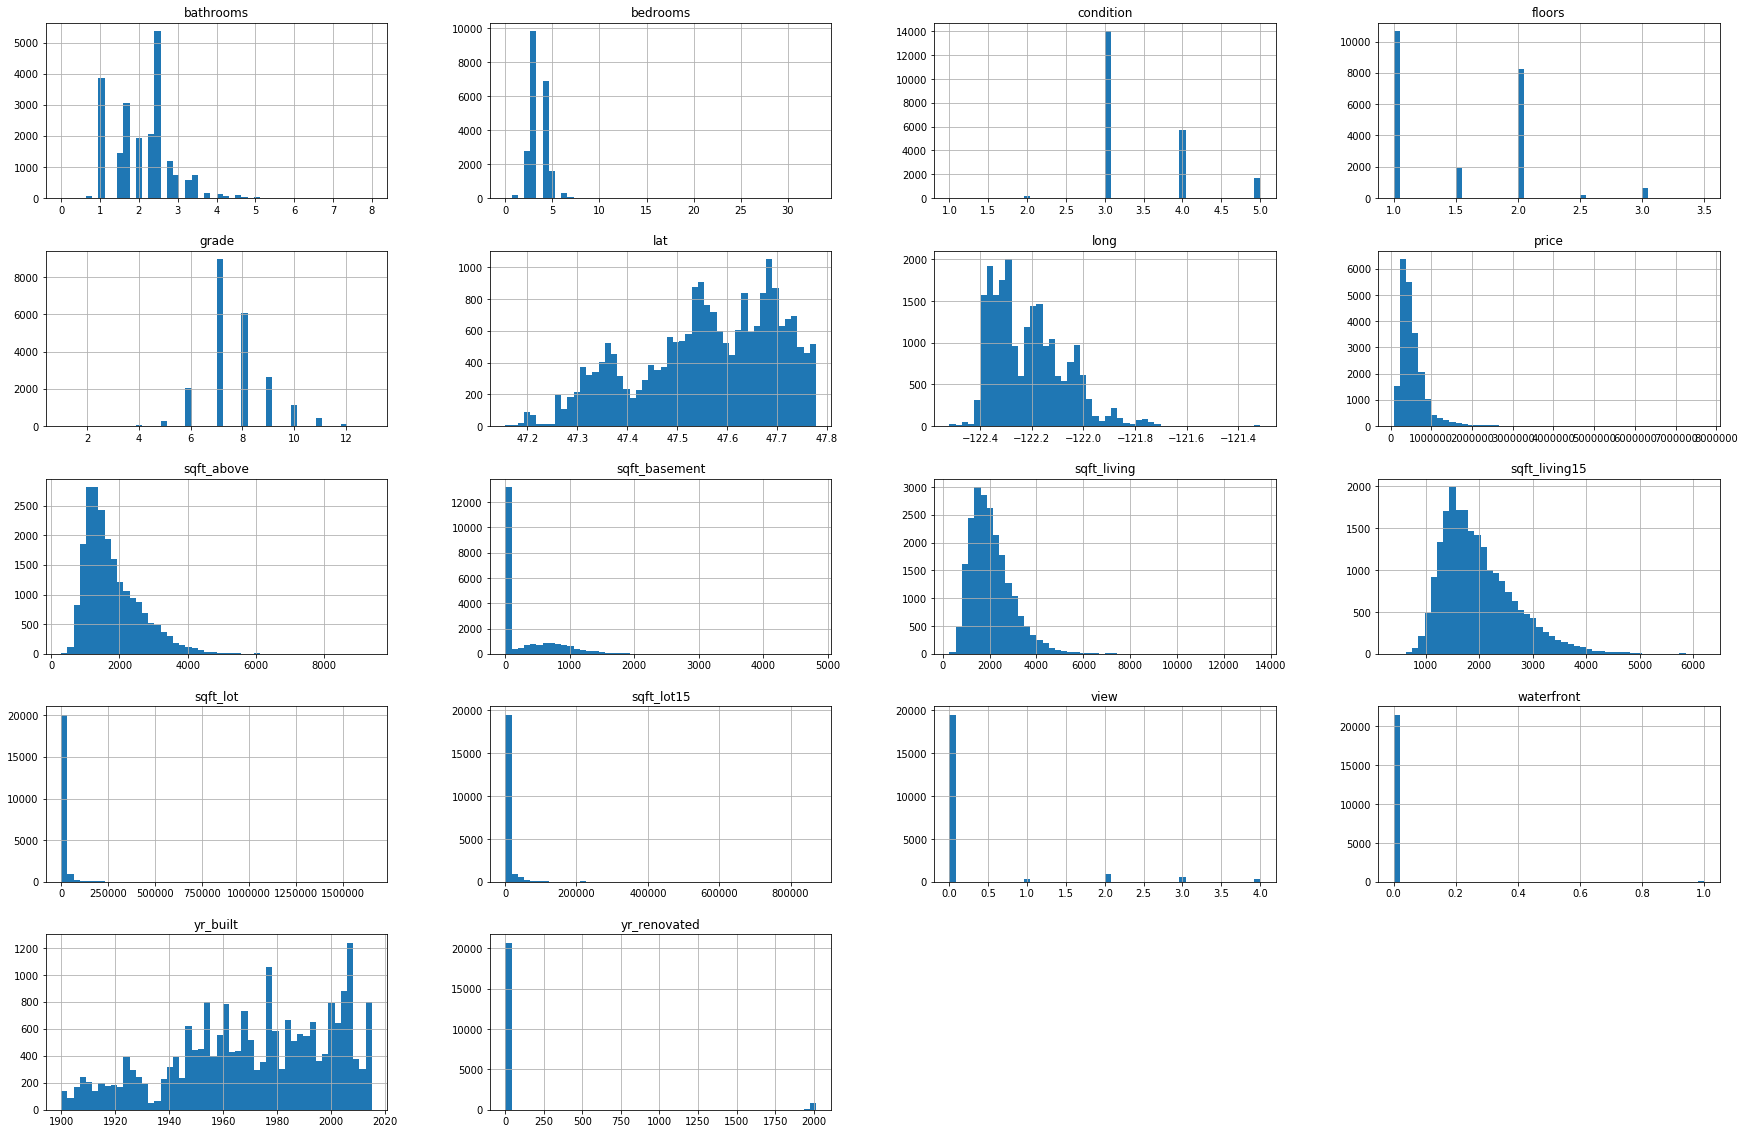

In [5]:
data.hist(figsize = (30,20), bins=50)
plt.show()

Some features are skewed to the right as the histograms above show but this is normal

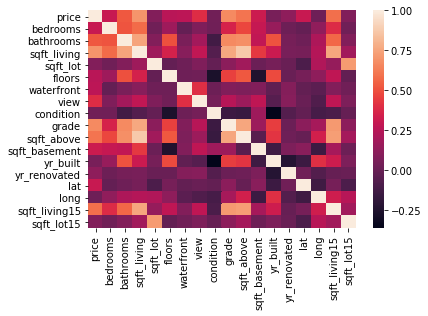

In [6]:
correlation = data.corr()
sns.heatmap(correlation)

As expected, the square feet of living room and grade are highly correlated with price of homes

In [7]:
correlation_matrix = data.corr()
correlation_matrix["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
Name: price, dtype: float64

The price of houses goes up as the square footage of livingroom, grade, and the number of bathrooms go up

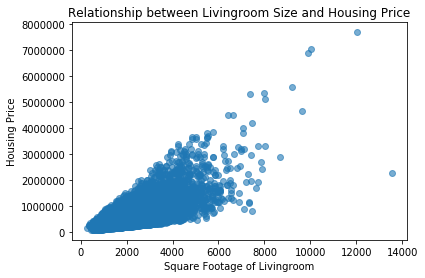

In [8]:
plt.scatter(data.sqft_living, data.price, alpha=0.6)
plt.xlabel("Square Footage of Livingroom")
plt.ylabel("Housing Price")
plt.title("Relationship between Livingroom Size and Housing Price")
plt.show()

As the separate scatter plot shows, there is a strong correlation between the living room size and the housing prices

# Training and Building a Linear Regression Model

In [9]:
X = data.drop(columns=['sqft_living15', 'sqft_lot15', 'price', 'date'])
y = data['price']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Predicting on the test set

In [12]:
Predicted = regressor.predict(X_test)

In [13]:
from sklearn.metrics import r2_score, mean_squared_error

# R2 score close to 1 is a good model

print(f"R2 score: {r2_score(y_test, Predicted)}")

# MSE score close to 0 is a good model

print(f"MSE score: {mean_squared_error(y_test, Predicted)}")

R2 score: 0.7039185497810467
MSE score: 40839522805.43987
